# Thursday: Bayesian classification

**KNN classifier**

Find the K number of nearest neighbours and assign the class of the most prevalent class among the neigbours. 

&rarr; completely non-parametric, thus very adequate when the decission boundry is highly non-linear, however needs a large number of samples and small set of predictors.

&rarr; needs a lot of observation as it needs neighbours to accurately classify. Predictors need to be small, because in high dimensional data points are close together and distances are computational taxing to calculate.

&rarr; Alternative approach when p and n are not adequate is quadratic discriminant analysis. 

&rarr; not adequate for inference as its non-parametric.

The following describes how a soft probability is derived from the nearest neighbours. $y_i$ = indicates the class for which the probability is calculated. The number of neigbours is summed up and divided over the total number of neighbours.
$$\Large Pr(Y=j|X=x_0)=\frac{1}{K} \sum_{i\in{\mathbb{N}_0}} I(y_1 = j)$$


**Bayesian probabilities**

posterior probability: revised probability of an event occuring after taking in new information. &rarr; probability of A given B &rarr; $P(A|B)$

Class-conditional probability: the reverse of posterior probability i.e. the probability of B given A e.g. the probability of sugar concentration being X given the fruit being red.  

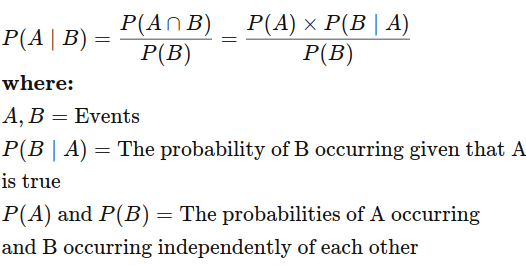

$\cap$ means intersect or overlap between events A and B occuring is comparable to "and"

for multiple classes this formula is extended where the denominator is the sum of all the probabilities of the other classes:
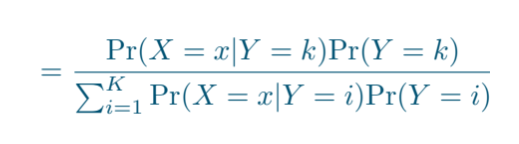

**The bayesian plug-in classifier relies on two parts**

* the probability density function $f_k(x)$ &rarr; effects the shape of the curve i.e. bimodal (2 peaks) etc.
* the prior probability of class K $\pi_k$ &rarr; effects the peak or tightness of the peaks.

The classifier the class that maximizes the probability 
$$\Large Pr(Y = K|X = x) = \frac{\pi_kf_k(x)}{\sum_{i=1}^K\pi_if_i(x)}$$


**Bayes' error**: the smallest error atainable i.e. the intersection area of the density distributions.
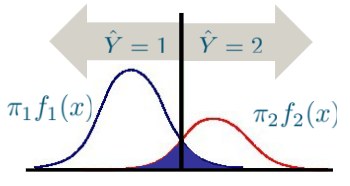

Probability distribution are assumed to be normal but their are others as well.


**Linear discriminant analysis**

General assumptions:
* Normality: predictors in each class are normally distributed.
* Homoscedasticity: variance of the predictors are the same in all classes.
* Linearity: the decision boundry between classes is a linear combination of predictor variables.
* independence of predictors within each class

*we assume the distributions have equal variances for simplicity sake*

In LDA the Gaussian (seen below) formula is used to assume the probability density.
$$\Large f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

The Gaussian takes in two parameters: the variance $\sigma$ and the mean $\mu$.

we can substitute this gaussian function inside the the probability function:
$$\Large Pr(Y = K|X = x) = \frac{\pi_kf_k(x)}{\sum_{i=1}^K\pi_if_i(x)}$$

which gives: 

$$\Large Pr(Y = K|X = x) = \frac{\pi_k\frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu_k}{\sigma}\right)^2}}{\sum_{i=1}^K\pi_i\frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu_i}{\sigma}\right)^2}} $$

by taking the log we can transform the function to:

$$\Large \delta_{k}(x)=x\cdot\frac{\mu_{k}}{\sigma^{2}}-\frac{\mu_{k}^{2}}{2\sigma^{2}}+\mathrm{log}(\pi_{k})$$

This function can be used to derive the Bayes decission boundry this is where $\large \delta_1(x) = \delta_2(x)$

$$\Large x = \frac{\mu_1 + \mu_2}{2}$$

In general the main parameters are defined as: 
* estimated mean of class K: $\Large \hat{\mu}_k = \frac{1}{n_k} \sum_{i:y_i=k} x_1$
* estimated variance: $\Large \hat{\sigma}^2 = \frac{1}{n-K} \sum_{k=1}^K \sum_{i:y_i=k}(x_i-\hat{\mu}_k)^2$
* estimated probability: $\Large \hat{\pi}_k = \frac{n_k}{n}$

with $n$ being the number of samples and $n_k$ the number of samples belonging to a class. $y_i$ being the "actual" class value.

For multivariate (having more than 1 predictors) LDA a multivariate guassian can be fitted in n-dimensional space 

**quadratic DA**

* QDA allows for different covariance matrices
* it assigns x to the class k for which te quadratic discriminant function is largest

$$\Large \delta_{k}(x)=x^{T}\Sigma^{-1}\mu_{k}-\frac{1}{2}\mu_{k}^{T}\Sigma^{-1}\mu_{k}+\log\pi_{k}$$

where $\Large \sum$ denotes the covariance matrix
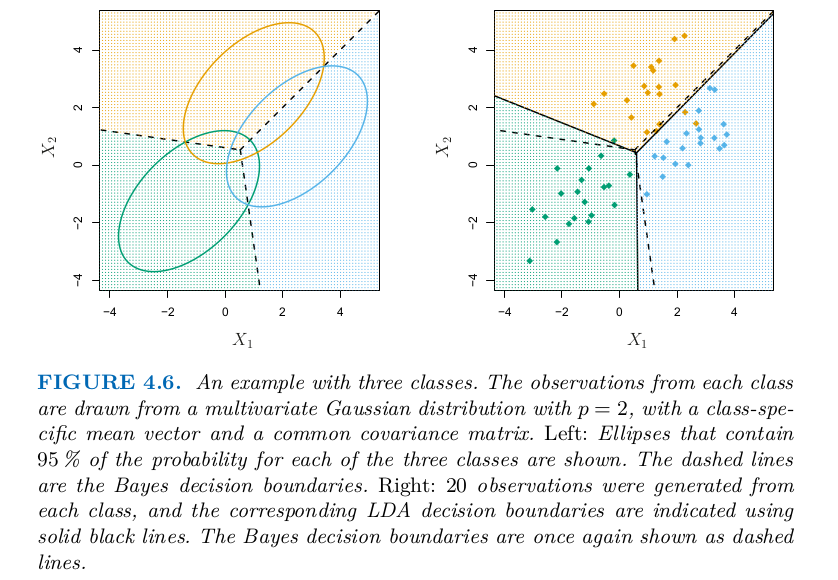

**Validation**

* confusion table shows the training error
* take into account the null rate &rarr; the error rate if we assign each object to the largest class
* take into account where the errors are i.e. FP or FN.

Confussion matrix:

* sensitivity &rarr; percentage of positive **correct** predictions TP / (TP+FN)
* specificity &rarr; percentage of negative **correct** predictions TN / (TN+FP)
* precission &rarr; percentage of predicted positives that is **correct** TP/(TP+FP)

&rarr; In LDA we can make the model less sensitive by decreasing the prior-probability and vice versa, this would be at &harr;

By modifying the threshold and rebuilding the confusion matrix we can plot the TPR vs the FPR for each iteration and build the Receiver Operator Characteristic Curve (ROC). Ideally we would want the curve take up the entire plot the AUC curve is the probability of making a wrong classification. 

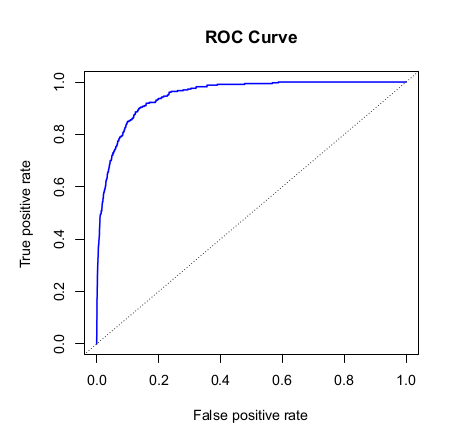

**Parametric vs non-parametric**

* LDA and QDA are parametric they assume a global model and estimate its parameters
* non-parametric no parameters are estimated, instead it estimates densities locally which is better for high dimensionality data and non-linear data.

*  

# Questions

**2.7) Calculate the eculidean distance between each of the points given below**

In [4]:
import numpy as np 
import pandas as pd
mat27 = np.matrix("0 3 0; 2 0 0; 0 1 3; 0 1 2; -1 0 1; 1 1 1")

In [10]:
df = pd.DataFrame(mat27)
df["Y"] = 3*["red"] + 2  * ["green"] + ["red"]

In [29]:
test = [0,0,0]

In [39]:
def eucl(test, obs):
    dist = np.linalg.norm(test - obs)
    return dist

In [54]:
df

0  1  2      Y
0  0  3  0    red
1  2  0  0    red
2  0  1  3    red
3  0  1  2  green
4 -1  0  1  green
5  1  1  1    red

In [50]:
for i in range(6):
    print(eucl(test, mat27[i]))

3.0
2.0
3.1622776601683795
2.23606797749979
1.4142135623730951
1.7320508075688772


**a + b)** *with K=1 the predicted cattegory is green.
With k = 3 the predicted cattegory is red*

*if the bayes decission boundry is highly non linear the best k would be small, as this makes the model more flexible*

**8. Suppose that we take a data set, divide it into equally-sized training
and test sets, and then try out two different classification procedures.
First we use logistic regression and get an error rate of 20 % on the
training data and 30 % on the test data. Next we use 1-nearest neigh-
bors (i.e. K = 1) and get an average error rate (averaged over both
test and training data sets) of 18 %. Based on these results, which
method should we prefer to use for classification of new observations?
Why?**

When K=1 the KNN model doesn't make mistakes on the test data this means that the error in the test data must be double the average of 18 percent, hence the model is worse than logistic regression.

In [335]:
gaus = lambda u, x, s: 1/ (np.sqrt(np.pi * 2) * s) * np.exp(-np.power((x-u)/s, 2) / 2)

In [336]:
gaus(10, 4, 6)

0.0403284540865239

In [337]:
X = np.linspace(-1, 10, 10)
Y1 = np.array(gaus(10, X, 6)) * 80
Y2 = np.array(gaus(0, X, 6)) * 20

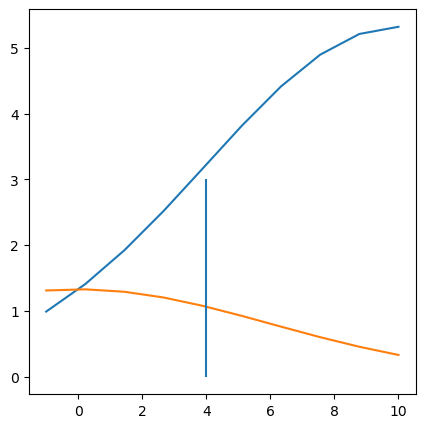

In [338]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,1, figsize=(5,5))
axes.plot(X,Y1)
axes.plot(X, Y2)
axes.vlines(4, 0, 3)

$\large Pr(div = Yes | X = 4) = \frac{Pr(div) * Pr(X = 4 | div = Yes)}{Pr(div = No)}$

In [339]:
gaus(10, 4, 6) * 0.8 / np.sum([gaus(0, 4, 6) * 0.8, gaus(10, 4, 6) * 0.2])

0.6368644712712337

**what sample size do you need to classify/predict**

**a) left or right based on 8 features**

In [373]:
s_size = lambda p: 0.5*p**2 + 0.5*p

In [375]:
# for quadratic model
s_size(8) * 2

72.0

In [376]:
# for linear model 

8 *2

16

**b) cancer type based on 2308 gene features**

In [377]:
# for quadratic model
s_size(2308) * 4

10658344.0

In [378]:
# for a linear model
2308 * 4

9232

**5. We now examine the differences between LDA and QDA.**

(a) If the Bayes decision boundary is linear, do we expect LDA or
QDA to perform better on the training set? On the test set?

&rarr; LDA would do better on the test set but worse on the training set as it is less likely to overfit but more inflexible

&rarr; QDA would do better on training set due to better flexibility but worse on the test set as it is more likely to overfit

(b) If the Bayes decision boundary is non-linear, do we expect LDA
or QDA to perform better on the training set? On the test set?

&rarr; QDA would do better on the test and training set compared to LDA because in this case you would need a flexible model, as LDA cannot model a non-linear decission boundry.

(c) In general, as the sample size n increases, do we expect the test
prediction accuracy of QDA relative to LDA to improve, decline,
or be unchanged? Why? 

&rarr; improve, the more samples the better the parameter estimation, as QDA has more parameters this would benefit QDA more. 

(d) True or False: Even if the Bayes decision boundary for a given
problem is linear, we will probably achieve a superior test er-
ror rate using QDA rather than LDA because QDA is flexible
enough to model a linear decision boundary. Justify your an-
swer.

&rarr; False, QDA needs more samples to estimate its parameters so choosing this model when it is not necessary would decrease model accuracy.

**4. When the number of features p is large, there tends to be a deteri-
oration in the performance of KNN and other local approaches that
perform prediction using only observations that are near the test ob-
servation for which a prediction must be made. This phenomenon is
known as the curse of dimensionality, and it ties into the fact that
curse of di-
non-parametric approaches often perform poorly when p is large. We
will now investigate this curse.**

(a) Suppose that we have a set of observations, each with measure-
ments on p = 1 feature, X. We assume that X is uniformly
(evenly) distributed on [0, 1]. Associated with each observation
is a response value. Suppose that we wish to predict a test obser-
vation’s response using only observations that are within 10 % of
the range of X closest to that test observation. For instance, in
order to predict the response for a test observation with X = 0.6,
we will use observations in the range [0.55, 0.65]. On average,
what fraction of the available observations will we use to make
the prediction?

&rarr; The range is 10 percent within from 0.6 this falls between 0 and 1 and the data is uniformly distributed so 10 percent of the total data is collected.

(b) Now suppose that we have a set of observations, each with
measurements on p = 2 features, X1 and X2 . We assume that
(X1 , X2 ) are uniformly distributed on [0, 1] × [0, 1]. We wish to
predict a test observation’s response using only observations that
are within 10 % of the range of X1 and within 10 % of the range
of X2 closest to that test observation. For instance, in order to
predict the response for a test observation with X1 = 0.6 and
X2 = 0.35, we will use observations in the range [0.55, 0.65] for
X1 and in the range [0.3, 0.4] for X2 . On average, what fraction
of the available observations will we use to make the prediction?

&rarr; 10 percent of 10 percent so 1 percent 

Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each
feature, and again each feature ranges in value from 0 to 1. We
wish to predict a test observation’s response using observations
within the 10 % of each feature’s range that is closest to that test
observation. What fraction of the available observations will we
use to make the prediction?

In [381]:
0.1**100

1.0000000000000056e-100

(d) Using your answers to parts (a)–(c), argue that a drawback of
KNN when p is large is that there are very few training obser-
vations “near” any given test observation.

&rarr; as add variables we add dimensions, in higher dimensional data the distance between points become very large so that there aren't near neighbours. In A-C we highlight this by comparing the number of samples with n-dimensional space, which decreases exponentially. 

(e) Now suppose that we wish to make a prediction for a test obser-
vation by creating a p-dimensional hypercube centered around
the test observation that contains, on average, 10 % of the train-
ing observations. For p = 1, 2, and 100, what is the length of each
side of the hypercube? Comment on your answer.

&rarr; as seen below as we increase the number of p-dimensions the amount of volume we need to sample to get 10 percent of the data aproximates 1 which means we would need to sample almost the entire hypercube. 

In [406]:
side = lambda p: 0.1**(1/p)

In [416]:
side(np.linspace(1, 11, 10, dtype = int))

array([0.1       , 0.31622777, 0.46415888, 0.56234133, 0.63095734,
       0.68129207, 0.71968567, 0.74989421, 0.77426368, 0.81113083])